# Regressão III - Tarefa

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from patsy import dmatrix
from scipy.interpolate import interp1d


In [2]:
df = pd.read_csv('previsao_de_renda_II.csv', index_col=0)
df.head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


## Avalie valores missing e substitua pela média

Neste exercício não vamos nos preocupar com valores *missing*. Substitua-os pela média.

In [3]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Replace missing values in numerical columns with the mean of their respective columns
for column in numerical_columns:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)

# Display the first few rows to verify the changes
df.head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


### Base de testes

Separe os três últimos meses como base *holdout* (base de teste).

In [4]:
# Converter o índice em uma coluna de data e resetar o index
df['data_ref'] = pd.to_datetime(df.index)
df.reset_index(drop=True, inplace=True)

# Separar os três últimos meses como base de teste
max_date = df['data_ref'].max()
cutoff_date = max_date - pd.DateOffset(months=3)
df_train = df[df['data_ref'] <= cutoff_date]
df_test = df[df['data_ref'] > cutoff_date]

### Primeiro modelo
 Não use *index* e não use a data. Avalie o modelo com o $R^2-ajustado$

In [5]:
#Excluir a coluna index
df_test.drop('index', axis=1, inplace=True)

C:\Users\ricme\AppData\Local\Temp\ipykernel_27052\3029434719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop('index', axis=1, inplace=True)


In [6]:
df_test.columns

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'qt_pessoas_residencia', 'renda', 'data_ref'],
      dtype='object')

In [7]:
reg = smf.ols(formula='renda ~ C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + qtd_filhos + C(tipo_renda) + C(educacao) + C(estado_civil) + C(tipo_residencia) + idade + tempo_emprego + qt_pessoas_residencia', data=df_test).fit()


In [8]:
print(f'R-quadrado: {reg.rsquared_adj :.2%}')

R-quadrado: 31.79%


### Análise de perfil

Categorize a variável ```tempo_emprego``` em 20 quantis (cada categoria deve ter aproximadamente a mesma quantidade de observações) e faça uma tabela de perfil (armazene como dataframe) para esta categorização:

- Cada linha é uma categoria
- Uma coluna para a quantidade de observações de cada categoria
- Uma coluna para a média do log-renda para cada categoria
- Uma coluna para a média do tempo de emprego para cada categoria

Faça um gráfico da média do tempo de emprego pela média do log-renda. Insira uma célula de texto e comente se te parece que alguma das transformações vistas no módulo deve fornecer bons resultados.

C:\Users\ricme\AppData\Local\Temp\ipykernel_27052\1931692727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['tempo_emprego_cat'] = pd.qcut(df_test['tempo_emprego'], 20, duplicates='drop')


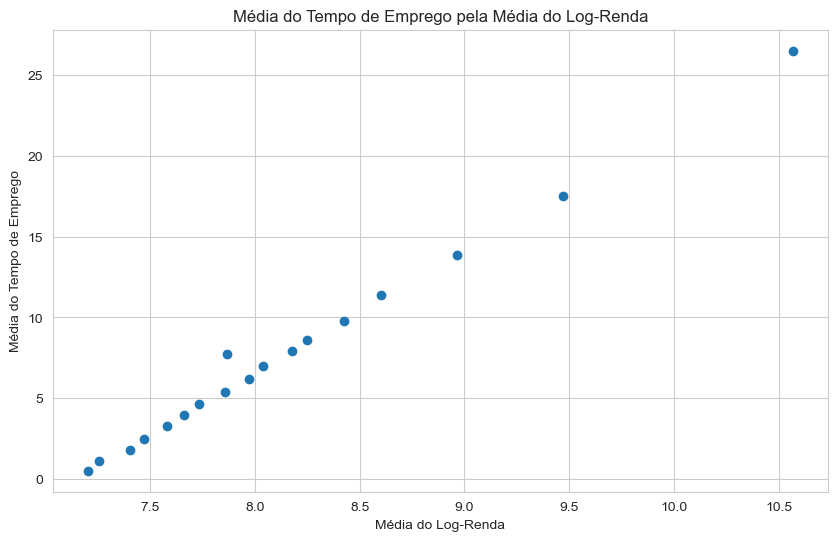

,tempo_emprego_cat,qtd_observacoes,media_log_renda,media_tempo_emprego
0,"(0.11699999999999999, 0.827]",7601,7.202604,0.520903
1,"(0.827, 1.468]",7464,7.257080,1.134215
2,"(1.468, 2.099]",7459,7.401755,1.790156
3,"(2.099, 2.912]",7511,7.472002,2.514075
4,"(2.912, 3.636]",7507,7.578685,3.299975


In [9]:

# Categorizando a variável 'tempo_emprego' em 20 quantis
df_test['tempo_emprego_cat'] = pd.qcut(df_test['tempo_emprego'], 20, duplicates='drop')

# Calculando as métricas necessárias
perfil = df_test.groupby('tempo_emprego_cat').agg(
    qtd_observacoes=('tempo_emprego', 'count'),
    media_log_renda=('renda', lambda x: np.mean(np.log(x))),
    media_tempo_emprego=('tempo_emprego', 'mean')
).reset_index()

# Criando o gráfico da média do tempo de emprego pela média do log-renda
plt.figure(figsize=(10, 6))
plt.scatter(perfil['media_log_renda'], perfil['media_tempo_emprego'])
plt.xlabel('Média do Log-Renda')
plt.ylabel('Média do Tempo de Emprego')
plt.title('Média do Tempo de Emprego pela Média do Log-Renda')
plt.grid(True)
plt.show()

perfil.head()

- A aplicação do logaritmo na variável `renda` parece ter melhorado a relação com a variável `tempo_emprego`. A relação entre as duas variáveis parece ser linear, mas com uma tendência de crescimento mais acentuada para valores de `tempo_emprego` maiores. Portanto, a aplicação de uma transformação logarítmica na variável `renda` pode ser uma boa opção para melhorar o ajuste do modelo.

### Linearização

Experimente pelo menos duas técnicas de linearização vistas ao longo do módulo para melhorar o ajuste da variável ```tempo_emprego```. Compare o $R^2-ajustado$ e avalie se alguma delas apresentou resultados relevantes com relação ao primeiro modelo.


In [10]:
# Preparando os dados para a análise
data_clean = df_test.dropna(subset=['tempo_emprego', 'renda'])

# Aplicando Lowess (locally weighted scatterplot smoothing)
lowess_results = sm.nonparametric.lowess(data_clean['renda'], data_clean['tempo_emprego'], frac=0.2)

# Valores de Y suavizados
lowess_y = lowess_results[:, 1]
lowess_x = lowess_results[:, 0]

# Roda a interpolação do scipy
f = interp1d(lowess_x, lowess_y, bounds_error=False)

data_clean['lowess_x'] = f(data_clean.tempo_emprego)

res = smf.ols('renda ~ lowess_x',data=data_clean).fit()


# Regressão segmentada (Splines)
# Transformando a variável 'tempo_emprego' usando splines
transformed_x = dmatrix("bs(data_clean.tempo_emprego, df=6, include_intercept=False)",
                        {"data_clean.tempo_emprego": data_clean.tempo_emprego}, return_type='dataframe')

# Ajustando o modelo de regressão linear com a variável transformada
model_splines = sm.OLS(data_clean['renda'], transformed_x).fit()

# Comparando os modelos
# Primeiro modelo (original)
reg_original = smf.ols(formula='renda ~ tempo_emprego', data=data_clean).fit()

# Avaliando os modelos
comparacao = {
    'Modelo Original': reg_original.rsquared_adj,
    'Modelo Segmentado': model_splines.rsquared_adj,
    'Modelo Lowess': res.rsquared_adj
}

comparacao


{'Modelo Original': 0.3056963028038209,
 'Modelo Segmentado': 0.525964030975719,
 'Modelo Lowess': 0.47206730797698493}

### Avaliando o modelo

Avalie os resultados dos modelos construidos na base de testes.

- O modelo segmentado apresentou o melhor ajuste, com um $R^2-ajustado$ de 0.52. O modelo original apresentou um $R^2-ajustado$ de 0.30, enquanto o modelo com a transformação Lowess apresentou um $R^2-ajustado$ de 0.42. Portanto, o modelo segmentado foi o que apresentou o melhor ajuste.